# Initial Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import Bunch
import warnings 
warnings.filterwarnings("ignore")

In [2]:
filepath = "./data/BostonHousing.csv"

orginal_data = pd.read_csv(filepath)

df = Bunch()

df.data = orginal_data.drop('medv', axis=1)  # Features
df.target = orginal_data['medv']  # Target variable

df.feature_names = orginal_data.columns.tolist()[:-1]  # Feature names
df.target_names = ['medv']  # Target variable name

In [3]:
data = pd.DataFrame(df.data,columns = df.feature_names)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [4]:
data['PRICE'] = df.target
# Let's separate feature variables and target variable

X = data.drop('PRICE',axis = 1)
y = data['PRICE']

In [5]:
data.shape


(506, 14)

# Train Test  Spliting

In [6]:
from sklearn.model_selection import train_test_split


In [7]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 129)

In [8]:
X_train.shape

(404, 13)

# Linear Regression


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [10]:

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-25.501257883769718


# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [12]:

ridge=Ridge()
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,100]
parameters={'alpha':alphas}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': alphas},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-05}
-25.50125862461946


# Lasso Regression

In [14]:
from sklearn.linear_model import Lasso


In [15]:

lasso=Lasso()
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,100]
parameters={'alpha':alphas}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [16]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
-25.501289788016948


# Prediction By test

In [17]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [18]:
import seaborn as sns


<Axes: xlabel='PRICE', ylabel='Density'>

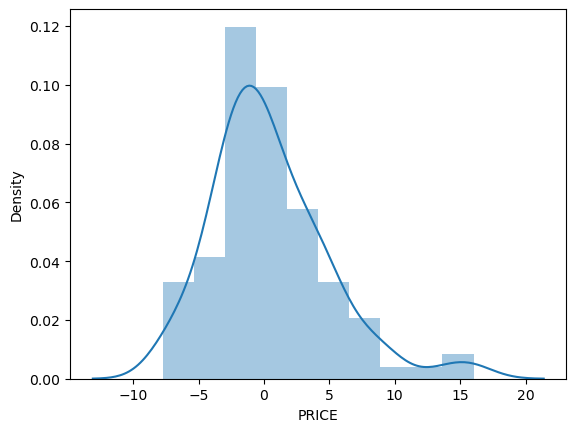

In [19]:

sns.distplot(y_test-prediction_lasso)

<Axes: xlabel='PRICE', ylabel='Density'>

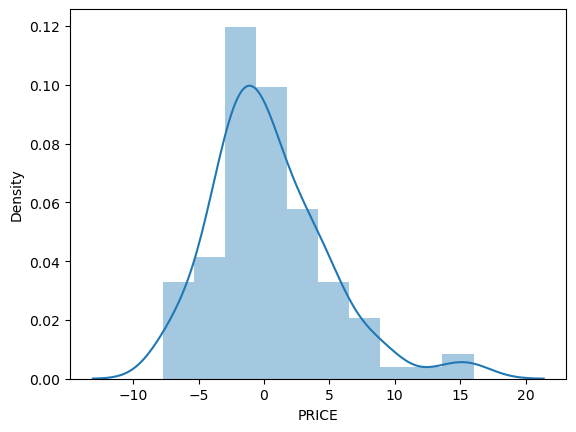

In [20]:

sns.distplot(y_test-prediction_ridge)

    Best Result is (Accourding by 5-Fold validation): 
        Lasso Regressio (alpha = 1e-05 and -25.501289788016948)       
        Ridge Regressio (alpha = 1e-05 and -25.50125862461946)